#### Importer les bibliotheque

In [78]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder


from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense , Conv2D 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

#### Importer le dataset

In [79]:
df_maladie = pd.read_csv("D:\Projet_DeepLearning\PMC\Data\maladies.csv")

df_maladie.head()

,Maladie,Fièvre,Toux,Maux de tête,Douleurs musculaires,Congestion nasale,Nausées,Diarrhée,Éruptions cutanées,Douleurs articulaires,Fatigue,Difficultés respiratoires,Mal de gorge
0,Gastro-entérite,0,0,0,0,0,1,1,0,0,0,0,0
1,Bronchite,0,1,0,1,0,0,0,0,0,0,1,0
2,Rougeole,1,1,0,0,0,0,0,1,0,0,0,0
3,Gastro-entérite,0,0,0,0,0,1,1,0,0,0,0,0
4,Malaria,1,0,0,1,0,0,0,0,0,1,0,0


#### Anamyser le dataset

In [80]:
print("ligne_clonne : " , df_maladie.shape , "taille : ", df_maladie.size , "dimension :" ,  df_maladie.ndim )

ligne_clonne :  (50000, 13) taille :  650000 dimension : 2


In [81]:
df_maladie.dtypes

Maladie                      object
Fièvre                        int64
Toux                          int64
Maux de tête                  int64
Douleurs musculaires          int64
Congestion nasale             int64
Nausées                       int64
Diarrhée                      int64
Éruptions cutanées            int64
Douleurs articulaires         int64
Fatigue                       int64
Difficultés respiratoires     int64
Mal de gorge                  int64
dtype: object

In [82]:
df_maladie.isnull().sum()

Maladie                      0
Fièvre                       0
Toux                         0
Maux de tête                 0
Douleurs musculaires         0
Congestion nasale            0
Nausées                      0
Diarrhée                     0
Éruptions cutanées           0
Douleurs articulaires        0
Fatigue                      0
Difficultés respiratoires    0
Mal de gorge                 0
dtype: int64

In [83]:
## on fait un groupement 
## cela trouve que toute les maladie on le méme symptomes
df_maladie.groupby("Maladie").nunique()


,Fièvre,Toux,Maux de tête,Douleurs musculaires,Congestion nasale,Nausées,Diarrhée,Éruptions cutanées,Douleurs articulaires,Fatigue,Difficultés respiratoires,Mal de gorge
Maladie,,,,,,,,,,,,
Angine,1,1,1,1,1,1,1,1,1,1,1,1
Bronchite,1,1,1,1,1,1,1,1,1,1,1,1
COVID-19,1,1,1,1,1,1,1,1,1,1,1,1
Dengue,1,1,1,1,1,1,1,1,1,1,1,1
Gastro-entérite,1,1,1,1,1,1,1,1,1,1,1,1
Grippe,1,1,1,1,1,1,1,1,1,1,1,1
Malaria,1,1,1,1,1,1,1,1,1,1,1,1
Rhume,1,1,1,1,1,1,1,1,1,1,1,1
Rougeole,1,1,1,1,1,1,1,1,1,1,1,1


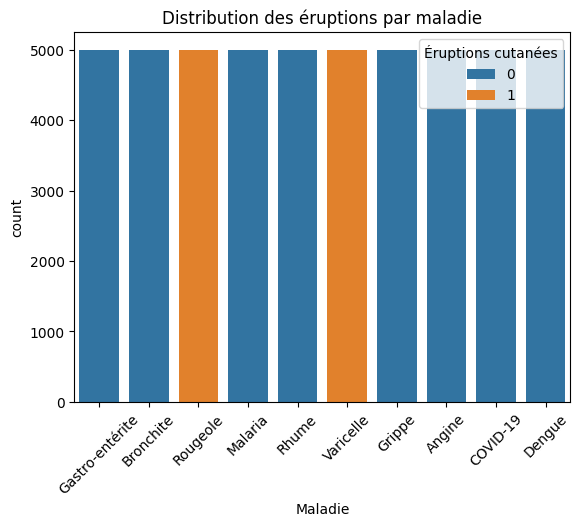

In [84]:
sns.countplot(x="Maladie", hue="Éruptions cutanées", data=df_maladie)
plt.xticks(rotation=45)
plt.title("Distribution des éruptions par maladie")
plt.show()


In [85]:
df_maladie.describe()

,Fièvre,Toux,Maux de tête,Douleurs musculaires,Congestion nasale,Nausées,Diarrhée,Éruptions cutanées,Douleurs articulaires,Fatigue,Difficultés respiratoires,Mal de gorge
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.700000,0.500000,0.100000,0.300000,0.100000,0.200000,0.100000,0.200000,0.100000,0.100000,0.200000,0.100000
std,0.458262,0.500005,0.300003,0.458262,0.300003,0.400004,0.300003,0.400004,0.300003,0.300003,0.400004,0.300003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
df_maladie["Maladie"].value_counts()

Maladie
Gastro-entérite    5000
Bronchite          5000
Rougeole           5000
Malaria            5000
Rhume              5000
Varicelle          5000
Grippe             5000
Angine             5000
COVID-19           5000
Dengue             5000
Name: count, dtype: int64

#### Analyser la dataset en graphe

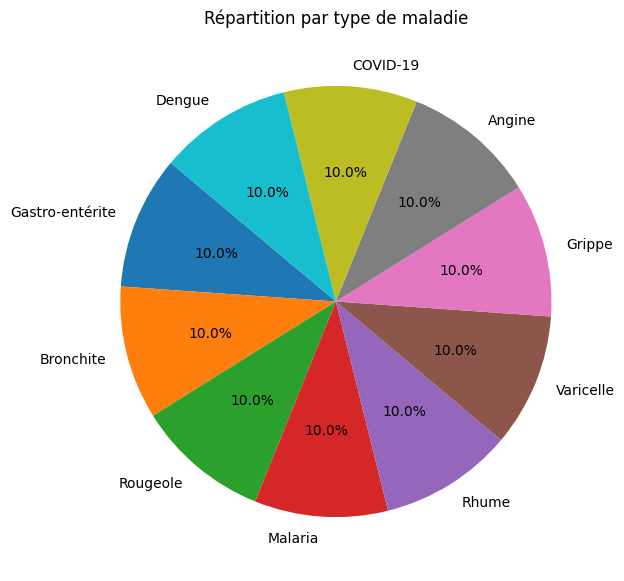

In [87]:
maladie_count = df_maladie["Maladie"].value_counts()
plt.figure(figsize=(7,7))

plt.pie(maladie_count , labels=maladie_count.index, autopct='%1.1f%%', startangle=140)
plt.title("Répartition par type de maladie")
plt.show()

### traitement du dataset

In [88]:
### transformer les vazrible cible en entier 
label_encoder = LabelEncoder()

df_maladie["Encoder_Maladie"]= label_encoder.fit_transform(df_maladie["Maladie"])


In [89]:
df_maladie.drop("Maladie", axis=1, inplace=True)

In [90]:
# sns.pairplot(df_maladie)

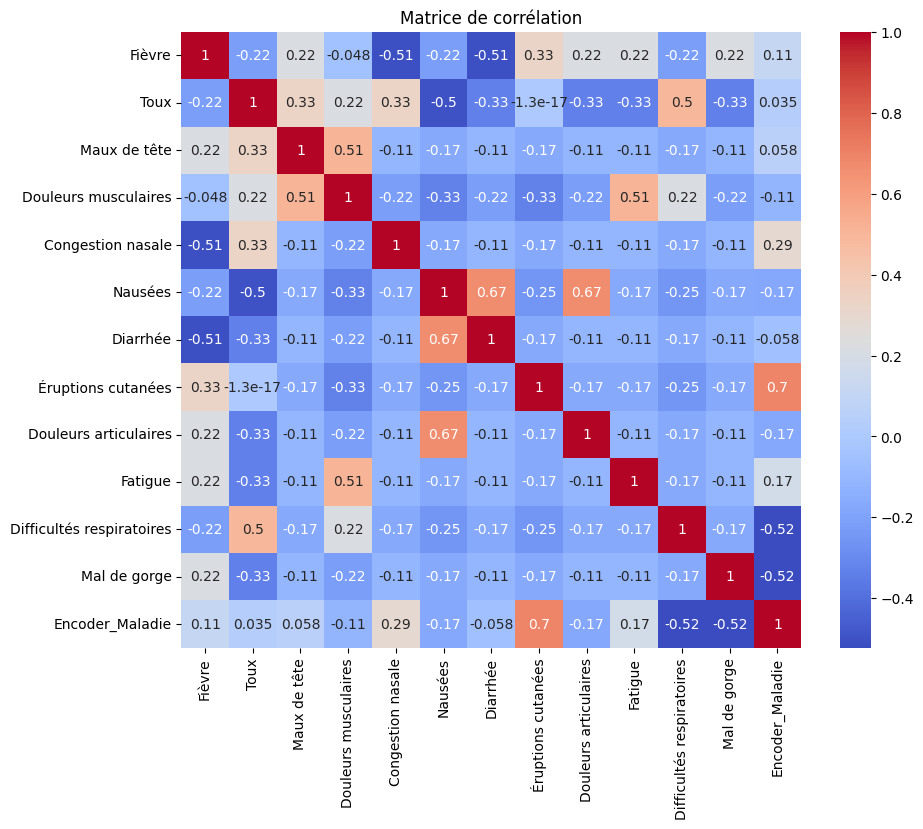

In [91]:
# Corrélation entre toutes les colonnes
plt.figure(figsize=(10, 8))
sns.heatmap(df_maladie.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

#### PMC (multiclass)

In [92]:
### diviser le dataset
y = df_maladie["Encoder_Maladie"]
x = df_maladie.drop("Encoder_Maladie" , axis=1)

x_train , x_test , y_train , y_test = train_test_split(x, y , test_size =0.2 , random_state=40)

print(x_train.shape)
print(y_train.shape)

(40000, 12)
(40000,)


In [93]:

## transforemr en one_hot_encoder

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

y_test_cat[0]


array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [94]:
### model 

model = Sequential([
    Dense(11 ,  input_shape = (12,)),
    Dense(64 , activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [95]:
### compilation du model 
model.compile(optimizer=Adam(learning_rate=0.001), loss = "categorical_crossentropy" , metrics=["accuracy"])

In [96]:
### Entrainement du model 

history = model.fit(x_train , y_train_cat )

1250/1250 [==============================] - 5s 2ms/step - loss: 0.1873 - accuracy: 0.9730


✅ Conclusion :
Le modèle ne parvient pas à apprendre correctement, car il est incapable de distinguer les différentes maladies. En effet, toutes les maladies présentent exactement les mêmes symptômes, ce qui empêche le modèle de détecter des différences significatives entre les classes.